# **Fashion MNIST classification using SVM and CNN**

---
Ruthvik Kanumuri - 734004406

Sri Akash Balu - 834006812

Jnana Preeti Parlapalli - 234009464


**Importing libraries required for the project**

In [1]:

import torch #open-source deep learning library- used for building and training neural networks
import torch.nn as nn #define custom neural network architectures
import torch.optim as optim #provides optimization algorithms used to update weights of neural network to minimize the loss
import torchvision #PyTorch library for computer vision tasks - provides datasets, transforms, and models specific to vision tasks.
from torchvision import datasets, transforms #handling datasets and data transformations, respectively
from torch.utils.data import DataLoader, random_split #efficiently load and iterate over datasets during training; splitting a dataset into random non-overlapping subsets, respectively
import matplotlib.pyplot as plt #plotting library in Python - used for visualizing data and results
import numpy as np #package for scientific computing
import pandas as pd #data manipulation and analysis library
import seaborn as sns #statistical data visualization library based on Matplotlib
import tensorflow as tf #open-source machine learning framework- it's used for specific functionalities not covered by PyTorch
from tensorflow.keras.datasets import fashion_mnist #importing the dataset required for our project from TensorFlow's Keras datasets
from sklearn.decomposition import PCA #importing PCA- the tool for Dimensionality reduction- visualizing high-dimensional data in lower dimensions
from pandas.plotting import scatter_matrix #creating scatterplot matrices
from tensorflow.keras.models import Sequential#linear stack of layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout, Conv3D, MaxPooling3D #layers used in Convolution Neural Networks(CNN)
from tensorflow.keras.utils import plot_model #creating a plot of a neural network model
from sklearn.metrics import classification_report #importing classification_report for evaluation
from sklearn.metrics import confusion_matrix #importing confusion_matrix for evaluation
from mpl_toolkits.mplot3d import Axes3D #for 3D plotting

from sklearn import svm
import time
from tensorflow.keras import layers
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split


In [2]:
pip install umap-learn #install umap-learn


In [3]:
import umap #Import UMAP for dimensionality reduction and data visualization

In [4]:
#Loading the dataset
fashion__mnist = tf.keras.datasets.fashion_mnist.load_data()


**Data Preparation**

In [5]:
# # Data Splitting
(train_images, train_labels), (test_images, test_labels) = fashion__mnist

# Split the data into training, validation, and testing sets
# Using train_test_split to achieve the 70:10:20 ratio
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.125, random_state=42)



In [6]:
# Data transformation

# Normalizing the pixel values to the [0, 1] range
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

**EDA**

In [7]:
#Data Statistics -I (1)
# Print the shapes of the resulting sets
print("Training set shape:", train_images.shape)
print("Validation set shape:", val_images.shape)
print("Testing set shape:", test_images.shape)
print("\n Number of classes:", len(set(train_labels)))

Training set shape: (52500, 28, 28)
Validation set shape: (7500, 28, 28)
Testing set shape: (10000, 28, 28)

 Number of classes: 10


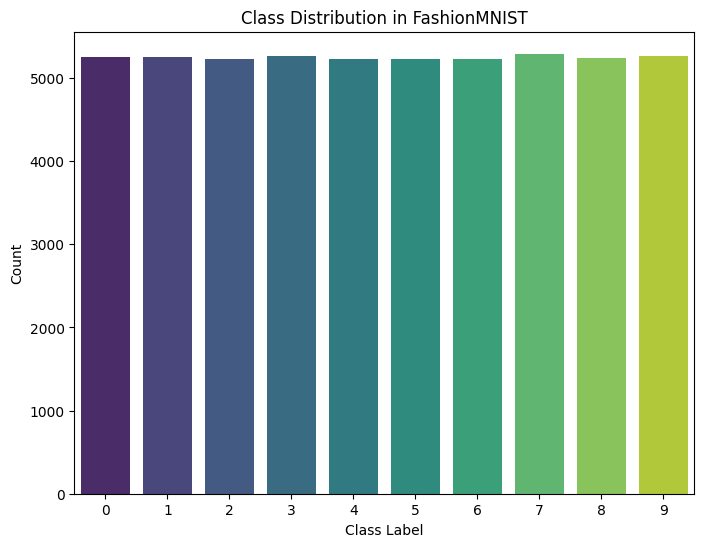

In [8]:
# Data Statistics - II(1)
# Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=train_labels, palette="viridis")
plt.title('Class Distribution in FashionMNIST')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

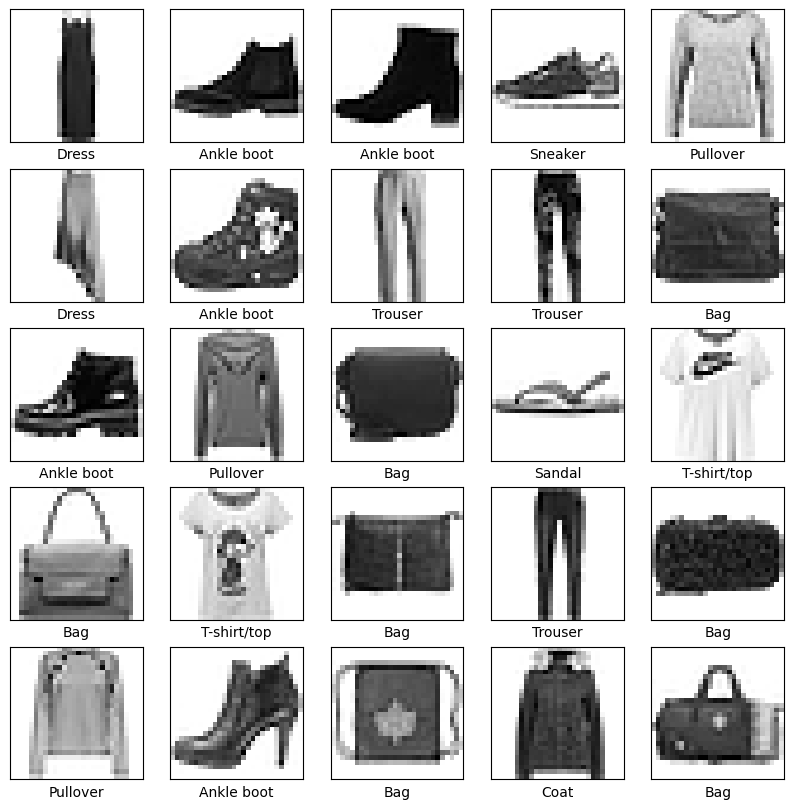

In [9]:
# Data Visualization - I

# Plotting examples from classes

# Define class names
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

# Function to display a grid of images
def display_images(images, labels, class_names, num_images=25):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

# Display a grid of 25 sample images from the training dataset
display_images(train_images, train_labels, class_names)

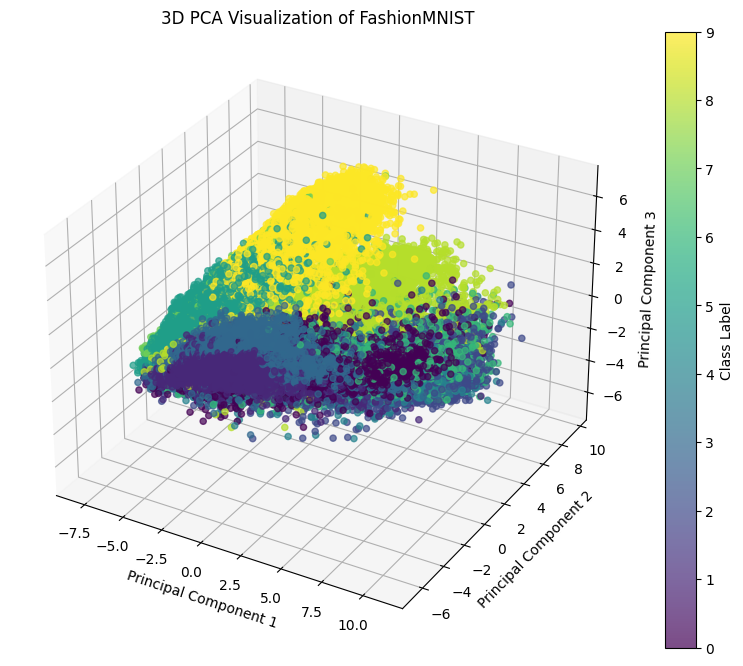

In [10]:
# Data Visualization - II

# Data Visualization - II(1)

# Data Visualization - II(1)(i)
#Performing PCA (Principal Component Analysis
#Dimensionality reduction and 3D visualization

# Flatten the 28x28 images to a 1D array of length 784
train_images_flat = train_images.reshape(-1, 784)
val_images_flat = val_images.reshape(-1, 784)
test_images_flat = test_images.reshape(-1, 784)

# Initialize PCA with count of components as 50
n_components = 50
pca = PCA(n_components=n_components)

# Fit PCA on the training data
pca.fit(train_images_flat)

# Apply PCA transformation to the training and testing data
train_images_pca = pca.transform(train_images_flat)
val_images_pca = pca.transform(val_images_flat)
test_images_pca = pca.transform(test_images_flat)

# Now, train_images_pca and test_images_pca contain the reduced dimensionality representations of the data

# Visualize 3D PCA representation
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    train_images_pca[:, 0],  # First principal component
    train_images_pca[:, 1],  # Second principal component
    train_images_pca[:, 2],  # Third principal component
    c=train_labels,           # Use labels for color
    cmap=plt.get_cmap('viridis'),
    marker='o',
    alpha=0.7
)

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Visualization of FashionMNIST')

# Add colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('Class Label')

plt.show()


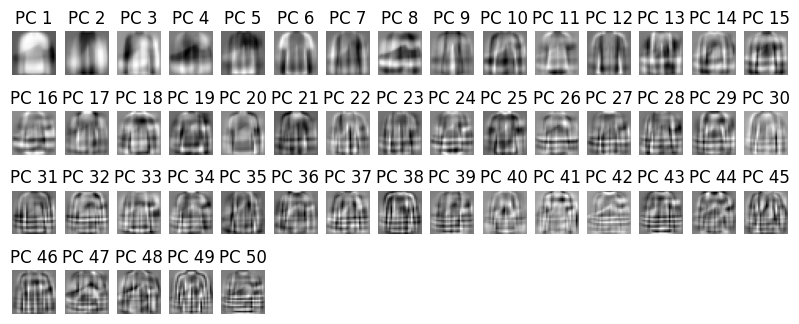

In [11]:
# Data Visualization - II(1)(ii)

# Displaying the components of PCA

# Access the principal components
principal_components = pca.components_

# Number of principal components
n_components = principal_components.shape[0]

# Create subplots to display the components
plt.figure(figsize=(10, 5))
for i in range(n_components):
    plt.subplot(5, 15, i + 1)
    component = principal_components[i].reshape(28, 28)
    plt.imshow(component, cmap='gray')
    plt.title(f'PC {i+1}')
    plt.axis('off')

plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


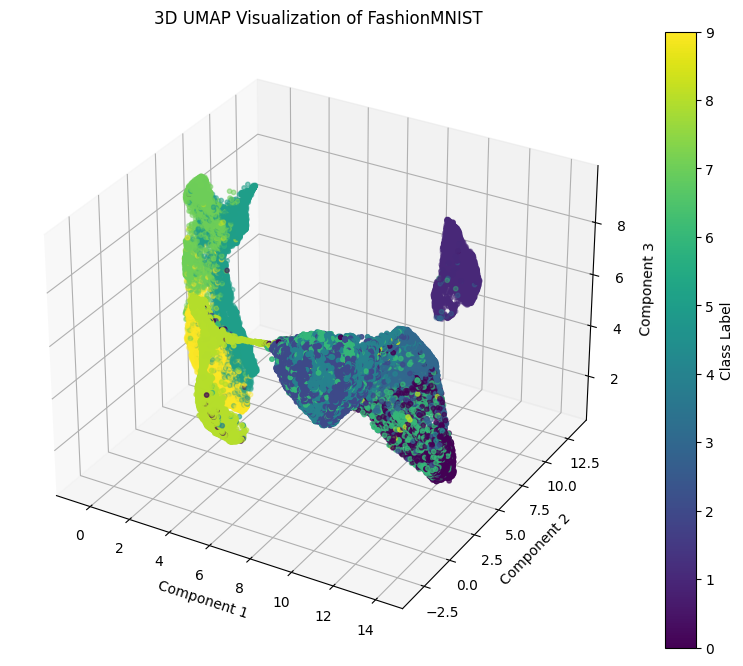

In [12]:
# Data Visualization - II(2)

# Perform UMAP for dimensionality reduction

umap_model = umap.UMAP(n_components=3, random_state=42)
train_images_umap = umap_model.fit_transform(train_images_flat)
# Visualize the 3D UMAP projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    train_images_umap[:, 0],
    train_images_umap[:, 1],
    train_images_umap[:, 2],
    c=train_labels,
    cmap='viridis',
    marker='o',
    s=10
)
ax.set_title('3D UMAP Visualization of FashionMNIST')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
fig.colorbar(scatter, ax=ax, label='Class Label')
plt.show()

# **Model selection**

**1. Support Vector Machine (SVM) classifier:**

 (i) Explain the algorithm selection:
  SVMs are capable of capturing non-linear relationships in the data, allowing businesses to identify subtle distinctions between fashion categories.

 (ii) Model building: Building the SVM model

 (iii) Evaluation metrics: To check for these metrics, we implemented the **classification report** consisting of accuracy, precision, recall, F1-score;   
 qualitative analysis- **confusion matrix** for classification on test set.

(iv) Model intepretability :
We implemented a **feature importance graph** for displaying the model interpretability.

In [13]:
#Support Vector Machine Classifier-  fitting the model

#1(ii)

# Train an SVM Classifier
svm = SVC(kernel='linear')
svm.fit(train_images_pca, train_labels)

# Make predictions on the validation set
val_predictions = svm.predict(val_images_pca)

# Evaluate the model on the validation set
accuracy = accuracy_score(val_labels, val_predictions)
print("Validation Accuracy:", accuracy)

# Make predictions on the test set
test_predictions = svm.predict(test_images_pca)

# Evaluate the model on the test set
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.8496
Test Accuracy: 0.8346


In [14]:
# The below code is the hyperparameter tuning of the above SVM Model.


# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# # Define the parameter grid
# param_grid = {'C': [0.1, 1, 10, 100],
#               'kernel': ['linear', 'rbf', 'poly']}

# # Create an SVM classifier
# svm = SVC()

# # Use GridSearchCV to find the best hyperparameters
# grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(train_images_pca, train_labels)

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

# # Make predictions on the validation set using the best model
# val_predictions = grid_search.predict(val_images_pca)

# # Evaluate the model on the validation set
# accuracy = accuracy_score(val_labels, val_predictions)
# print("Validation Accuracy:", accuracy)

# # Make predictions on the test set using the best model
# test_predictions = grid_search.predict(test_images_pca)

# # Evaluate the model on the test set
# test_accuracy = accuracy_score(test_labels, test_predictions)
# print("Test Accuracy:", test_accuracy)

In [15]:
# About the trained model
print("Support Vectors:", svm.support_vectors_)
print("\n Number of Support Vectors for each class:", svm.n_support_)
print("\n Coefficients of the support vector machine:", svm.coef_)
print("\n Intercept:", svm.intercept_)


Support Vectors: [[-4.97814649 -3.77356513 -2.09364714 ...  0.09230476  0.12736404
   0.1477406 ]
 [-3.30124587 -3.11313135 -0.83853322 ...  0.08675093  0.52827944
  -0.06783927]
 [-1.79087591 -3.05330968 -1.00567215 ... -0.27749579  0.06445637
   0.45275521]
 ...
 [-5.12679347 -0.30437448 -0.86582919 ...  0.35852533  0.12450761
   0.28371529]
 [-5.56727085 -0.63183974  0.03990639 ...  0.21857486 -0.24072983
  -0.56830001]
 [-3.84252019  4.74142673  1.68135014 ...  0.04363543 -0.3210394
  -0.0943023 ]]

 Number of Support Vectors for each class: [2255  397 2996 1582 2832  905 4107 1127  679  739]

 Coefficients of the support vector machine: [[ 0.01459123  0.51644335  0.4608851  ...  0.35816929 -0.96178465
   0.25710463]
 [-0.03425394 -0.37143503  0.58987167 ... -0.22816112 -0.08590674
  -0.17691064]
 [ 0.24437948  0.19740376  0.07538572 ... -0.57998288 -0.82225589
   0.35432817]
 ...
 [-1.25088471  0.31556561  0.76395404 ... -1.01192774  0.19414565
  -0.28007651]
 [ 0.36893004 -1.0109

In [16]:
# 1(iii)

# Model evaluation

# Evaluation metrics
accuracy = accuracy_score(test_labels, test_predictions)
report = classification_report(test_labels, test_predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report: {report}")

Accuracy: 0.8346
Classification Report:               precision    recall  f1-score   support

           0       0.77      0.81      0.79      1000
           1       0.97      0.95      0.96      1000
           2       0.73      0.71      0.72      1000
           3       0.83      0.86      0.85      1000
           4       0.73      0.74      0.73      1000
           5       0.94      0.92      0.93      1000
           6       0.59      0.54      0.56      1000
           7       0.90      0.93      0.92      1000
           8       0.94      0.94      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



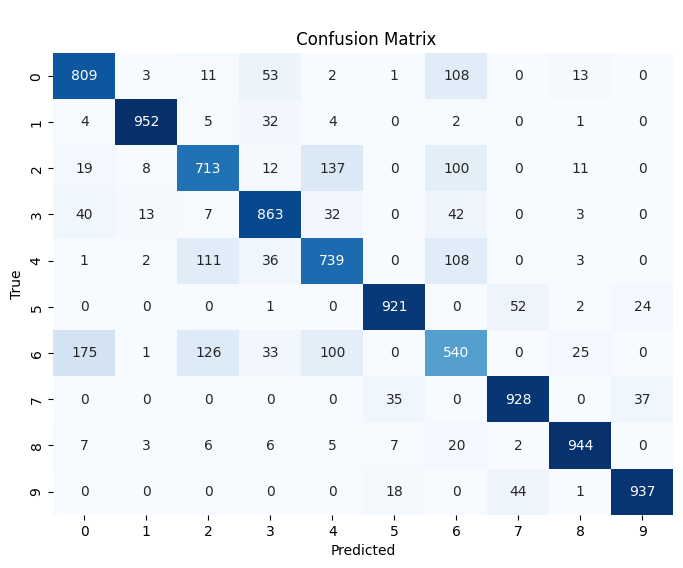

In [17]:
# Qualitative Analysis

# Visualize the confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(test_labels),
            yticklabels=np.unique(test_labels))
plt.title("\n Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

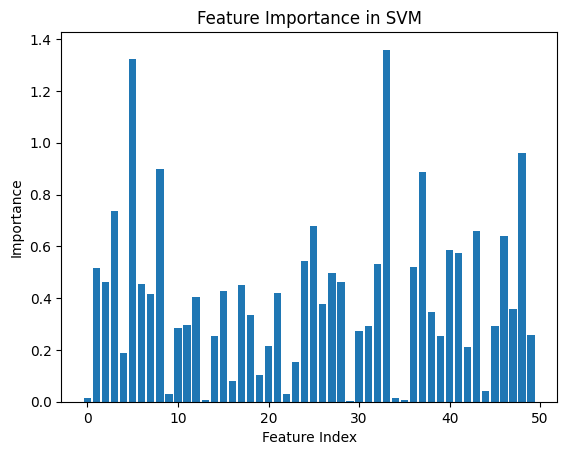

In [18]:
# 1(iv)

# Model Interpretability

# Extract feature importance from coefficients
feature_importance = np.abs(svm.coef_)

# # Print or visualize feature importance
# print("Feature Importance:")
# for i, importance in enumerate(feature_importance[0]):
#     print(f"Feature {i+1}: {importance}")

# Plot feature importance
plt.bar(range(len(feature_importance[0])), feature_importance[0])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance in SVM')
plt.show()

**2. Connvolution Neural Network (CNN) classifier:**

 (i) Explain algorithm selection : The hierarchical feature learning of CNNs allows for the extraction of complex patterns, textures, and shapes within the images.

 (ii) Model building: Building the SVM model

 (iii) Evaluation metrics: To check for these metrics, we implemented the **classification report** consisting of accuracy, precision, recall, F1-score;   
 qualitative analysis- **confusion matrix** for classification on test set.


In [19]:
#2(ii)

In [20]:
# CNN without hyperparameter tuning

# Reshape the images to add a channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
val_images = val_images.reshape((val_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=1, validation_data=(val_images, val_labels))

1641/1641 [==============================] - 88s 52ms/step - loss: 0.5096 - accuracy: 0.8132 - val_loss: 0.3618 - val_accuracy: 0.8653


In [21]:
#classification report for CNN without hyperparameter tuning

from sklearn.metrics import classification_report

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Use the trained model to predict the test set
predictions = model.predict(test_images)

# Convert the one-hot encoded predictions to class labels
predicted_labels = tf.argmax(predictions, axis=1)

# Print the classification report
print(classification_report(test_labels, predicted_labels))

313/313 [==============================] - 3s 9ms/step - loss: 0.3777 - accuracy: 0.8587
Test accuracy: 0.8586999773979187
313/313 [==============================] - 5s 14ms/step
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.80      0.79      1000
           3       0.89      0.88      0.88      1000
           4       0.75      0.78      0.77      1000
           5       0.99      0.91      0.95      1000
           6       0.60      0.64      0.62      1000
           7       0.91      0.93      0.92      1000
           8       0.97      0.94      0.96      1000
           9       0.91      0.97      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [22]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# from tensorflow.keras import layers
# from kerastuner.tuners import RandomSearch

# # Assuming train_images, train_labels, val_images, val_labels are defined

# # Function to define the model for hyperparameter tuning
# def build_model(hp):
#     model = Sequential()
#     model.add(Conv2D(hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
#                      (3, 3), activation='relu', input_shape=(28, 28, 1)))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Conv2D(hp.Int('conv2_filters', min_value=32, max_value=128, step=32),
#                      (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Conv2D(hp.Int('conv3_filters', min_value=32, max_value=128, step=32),
#                      (3, 3), activation='relu'))
#     model.add(Flatten())
#     model.add(Dense(hp.Int('dense_units', min_value=32, max_value=256, step=32),
#                     activation='relu'))
#     model.add(Dense(10, activation='softmax'))

#     model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])

#     return model

# # Initialize the tuner
# tuner = RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=5,  # You can adjust this number based on computational resources
#     executions_per_trial=1,
#     directory='my_dir',
#     project_name='cnn_tuning')

# # Perform the search
# tuner.search(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# # Get the best model
# best_model = tuner.get_best_models(num_models=1)[0]

# # Summary of the best model
# best_model.summary()

<ipython-input-22-efac4200dadc>:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


Reloading Tuner from my_dir/cnn_tuning/tuner0.json
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 96)        960       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       110720    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         147584    
                                                                 
 flat

In [24]:
# # Fit the best model and capture the history
# history = best_model.fit(train_images, train_labels, epochs=5, validation_data=(val_images, val_labels))



In [25]:
# For simplicity, we show the case for an epoch
best_model.fit(train_images, train_labels, epochs=1, validation_data=(val_images, val_labels))


1641/1641 [==============================] - 231s 141ms/step - loss: 0.1822 - accuracy: 0.9308 - val_loss: 0.2495 - val_accuracy: 0.9073


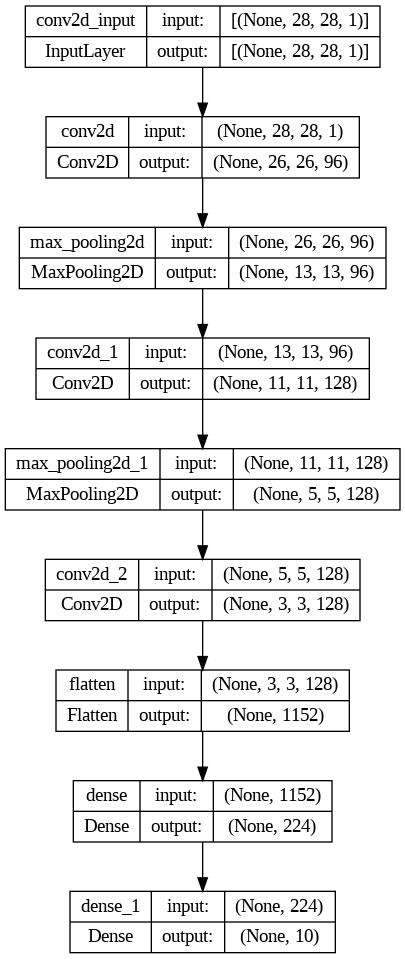

In [26]:
 # Visualize the model architecture
plot_model(best_model, show_shapes=True, to_file='cnn_model.png')

In [28]:
# # Plot the accuracy after performing hyperparameter tuning on 5 epochs
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label='val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')
# plt.show()

# # Plot the loss
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(loc='upper right')
# plt.show()

In [29]:
#3(ii)
#classification report

from sklearn.metrics import classification_report

# Evaluate the model on the test set
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Use the trained model to predict the test set
predictions = best_model.predict(test_images)

# Convert the one-hot encoded predictions to class labels
predicted_labels = tf.argmax(predictions, axis=1)

# Print the classification report
print(classification_report(test_labels, predicted_labels))

313/313 [==============================] - 13s 42ms/step - loss: 0.2637 - accuracy: 0.9072
Test accuracy: 0.9071999788284302
313/313 [==============================] - 9s 27ms/step
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1000
           1       1.00      0.98      0.99      1000
           2       0.87      0.82      0.85      1000
           3       0.86      0.96      0.91      1000
           4       0.86      0.84      0.85      1000
           5       0.98      0.99      0.98      1000
           6       0.73      0.74      0.74      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.96      0.97      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



313/313 [==============================] - 9s 30ms/step


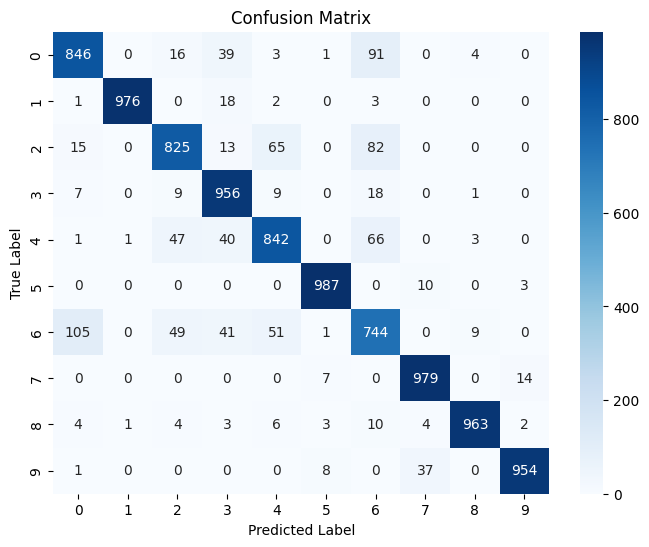

In [30]:
#2(ii)

# Visualize the confusion matrix
predictions = np.argmax(best_model.predict(test_images), axis=1)
cm = confusion_matrix(test_labels, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

235/235 [==============================] - 6s 26ms/step


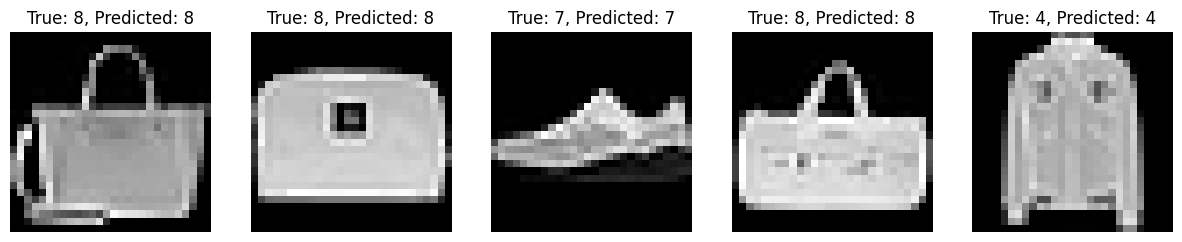

In [31]:
test_images_reshaped = test_images.reshape((test_images.shape[0], 28, 28, 1))


# Use the best model to make predictions on the validation set
predictions = best_model.predict(val_images)
predicted_labels = np.argmax(predictions, axis=1)


# Display some images with their true and predicted labels
num_images_to_display = 5
plt.figure(figsize=(15, 3))

# Find indices where predictions are correct, incorrect respectively.
correct_indices = np.where(predicted_labels == val_labels)[0]
incorrect_indices = np.where(predicted_labels != val_labels)[0]

#Correct predictions
for i, idx in enumerate(correct_indices[:num_images_to_display]):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(val_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {val_labels[idx]}, Predicted: {predicted_labels[idx]}')
    plt.axis('off')

plt.show()



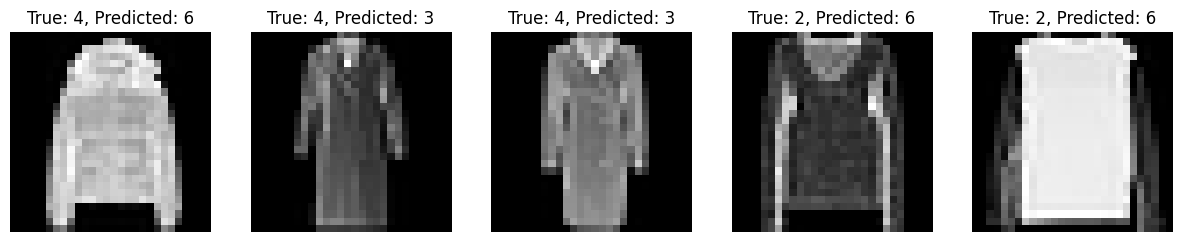

In [32]:
#incorrect predictions

plt.figure(figsize=(15, 3))

for i, idx in enumerate(incorrect_indices[:num_images_to_display]):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(val_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {val_labels[idx]}, Predicted: {predicted_labels[idx]}')
    plt.axis('off')

plt.show()




# **Conclusion**:

The accuracy of the SVM model is 0.8346, while CNN model after hyperparameter tuning is 0.9732 (on implementing for 5 Epochs). Even for  1 Epoch, accuracy is 0.9061 for CNN, which is very high. Hence, with these high accuracy values of implementing the CNN model, we can conclude that it is the best classifier on the FashionMNIST dataset.
